# Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

### Correlation

In [5]:
new_columns = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
new_columns

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
new_columns.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Visualizing the data

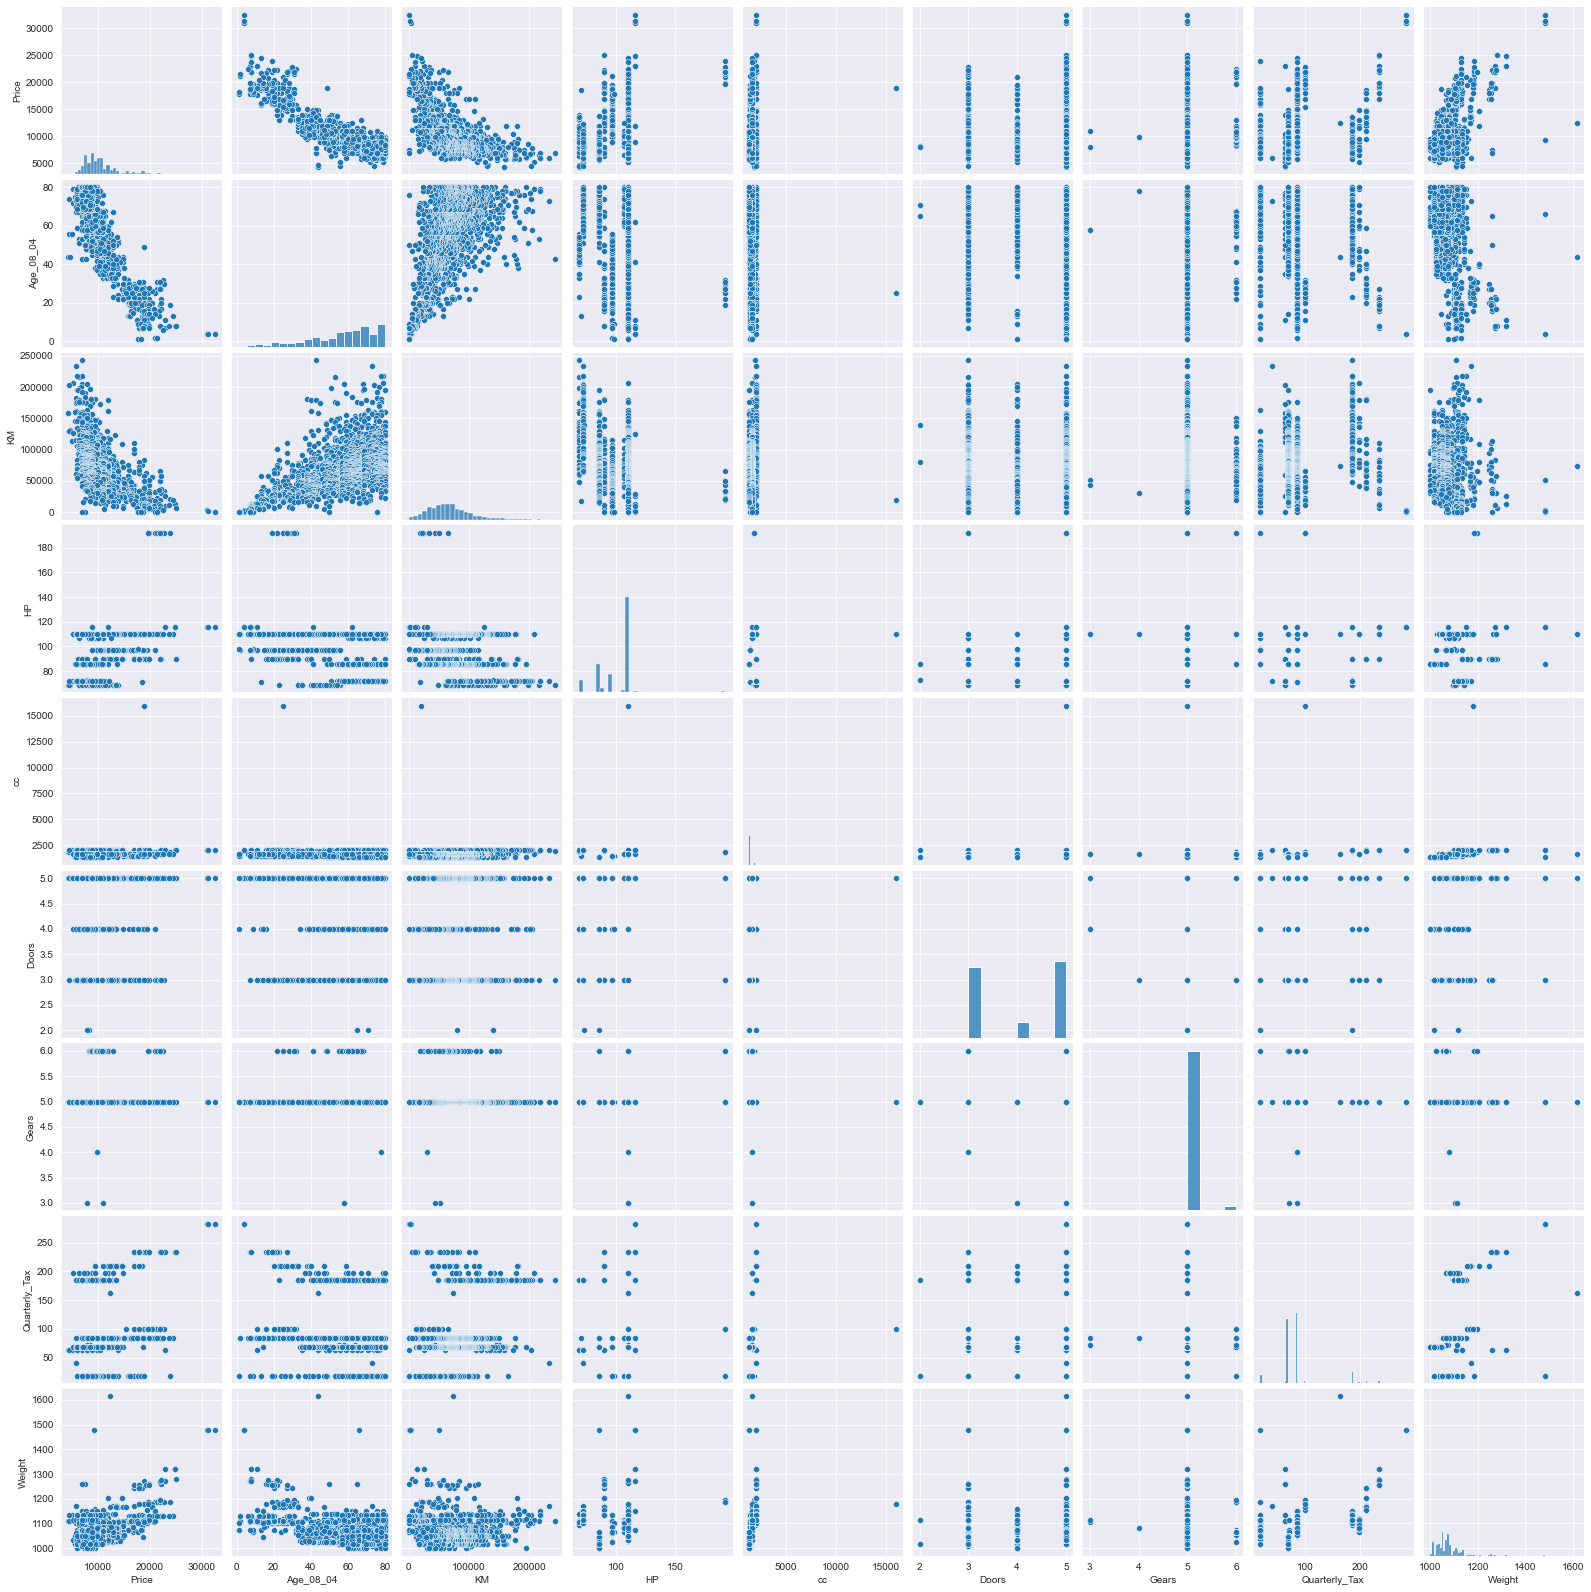

In [7]:
sns.set_style(style = 'darkgrid')
sns.pairplot(new_columns)

### Preparing a model

In [8]:
# Build model
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = new_columns).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:44:16   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Beta Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

with 1 unit increase in HP

Profit also increases by 31.6809

and

with 1 unit increase in Age_08_04

Profit value will reduce by -121.658

becoz HP is positive and Age_08_04 is negative

### t values and p values

In [11]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


 ### Rsquare values

In [12]:
(model.rsquared, model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

### Calculating VIF

In [13]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+cc+Age_08_04+Gears+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight', data = new_columns).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Age_08_04+Weight', data = new_columns).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax+Age_08_04', data = new_columns).fit().rsquared
vif_wt = 1/(1-rsq_wt)

# Starting vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qt, vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [14]:
new_columns['Predicted'] = model.fittedvalues
new_columns['Errors'] = model.resid
new_columns

<ipython-input-14-284319dd5dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns['Predicted'] = model.fittedvalues
<ipython-input-14-284319dd5dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns['Errors'] = model.resid


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


### Residual analysis

In [15]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

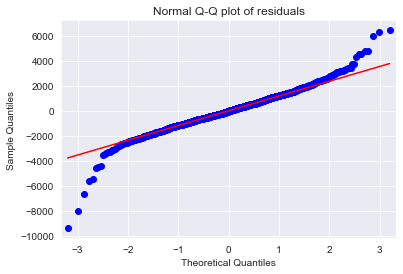

In [16]:
qqplot = sm.qqplot(model.resid, line = 'q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

### Residual for Homoscedasticity

In [18]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

0       1.804216
1       1.643952
2       1.800701
3       1.689680
4       1.629138
          ...   
1431   -0.574651
1432   -0.723699
1433   -0.675355
1434   -0.638646
1435   -0.097419
Length: 1436, dtype: float64
0      -2.474430
1      -1.884148
2      -2.129439
3      -1.102913
4      -1.846847
          ...   
1431   -0.966411
1432    1.907533
1433    0.034138
1434   -0.992017
1435   -2.578901
Length: 1436, dtype: float64


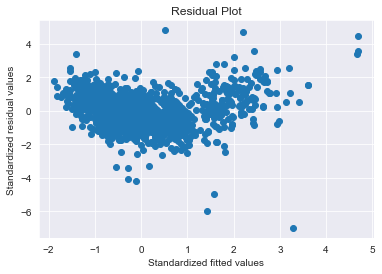

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual vs Regressor

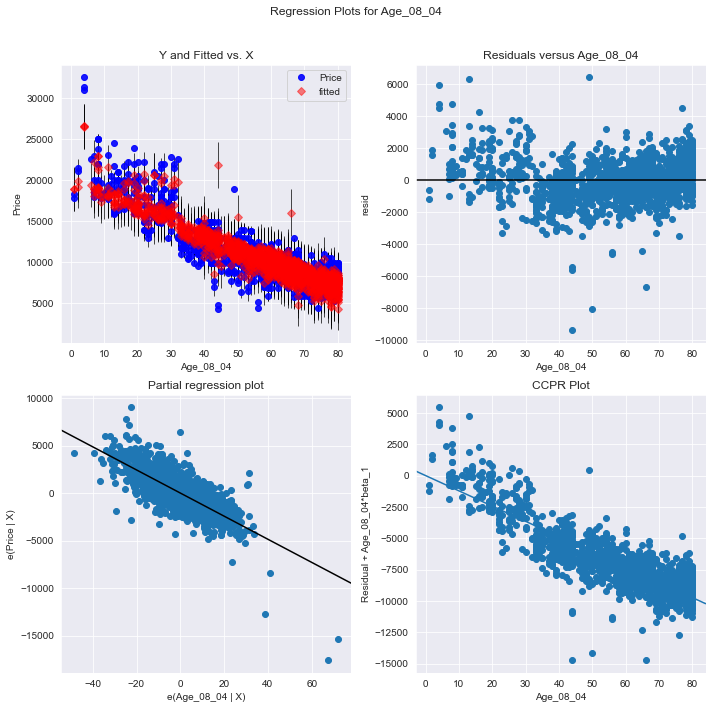

In [20]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'Age_08_04', fig = fig)
plt.show()

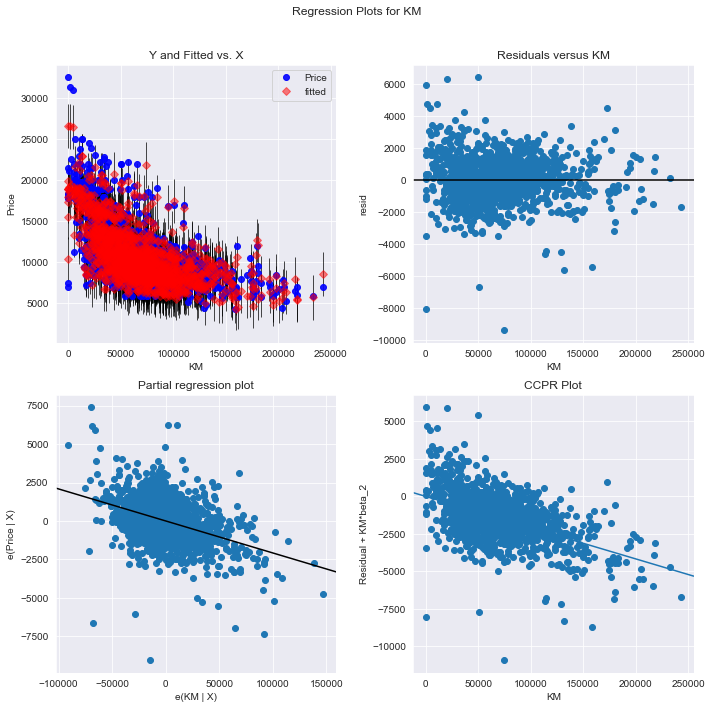

In [21]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

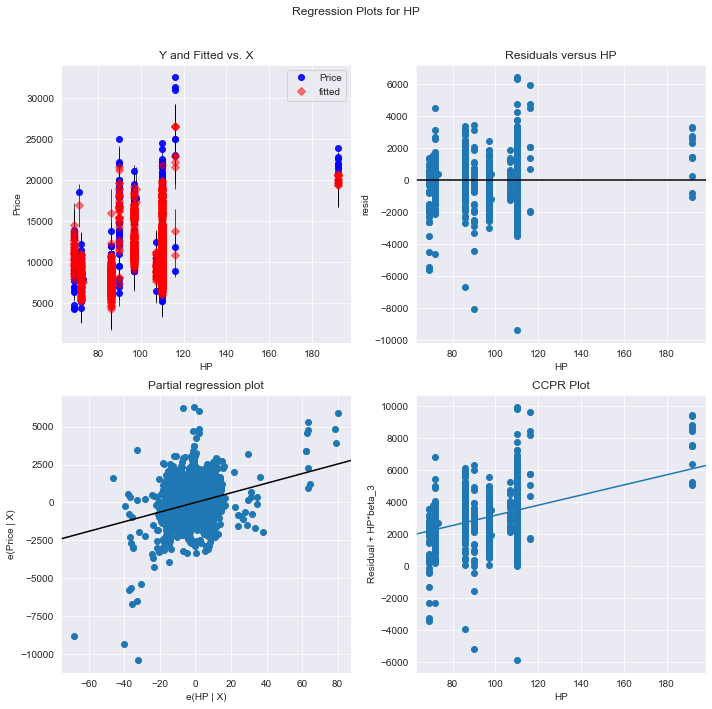

In [22]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

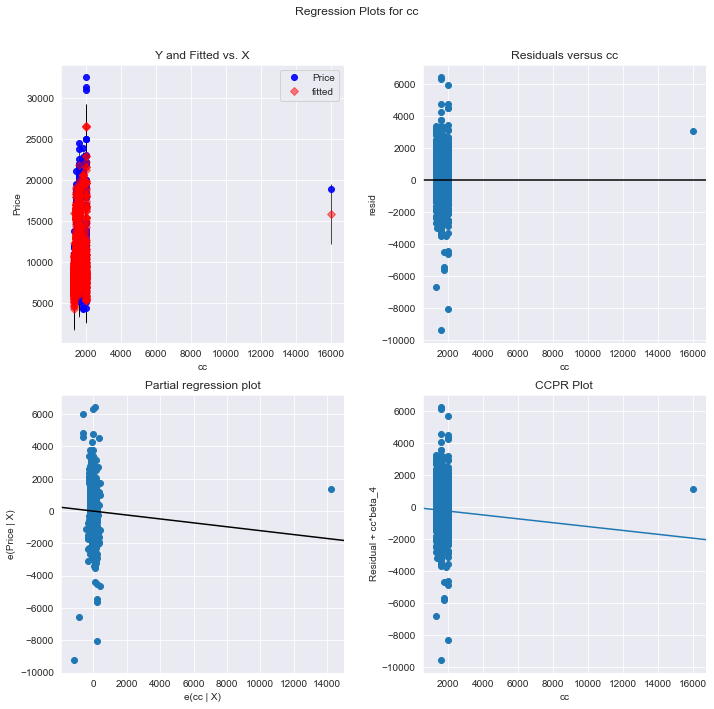

In [23]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig = fig)
plt.show()

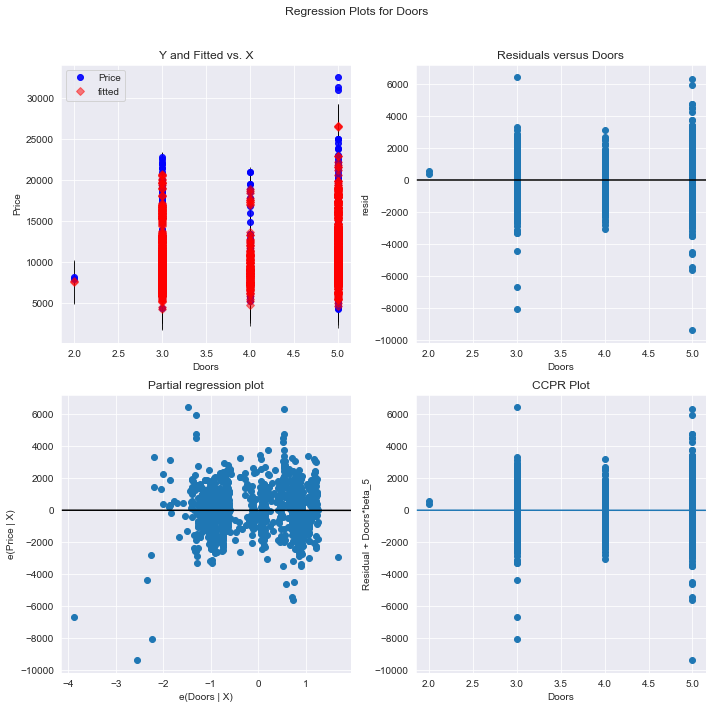

In [24]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

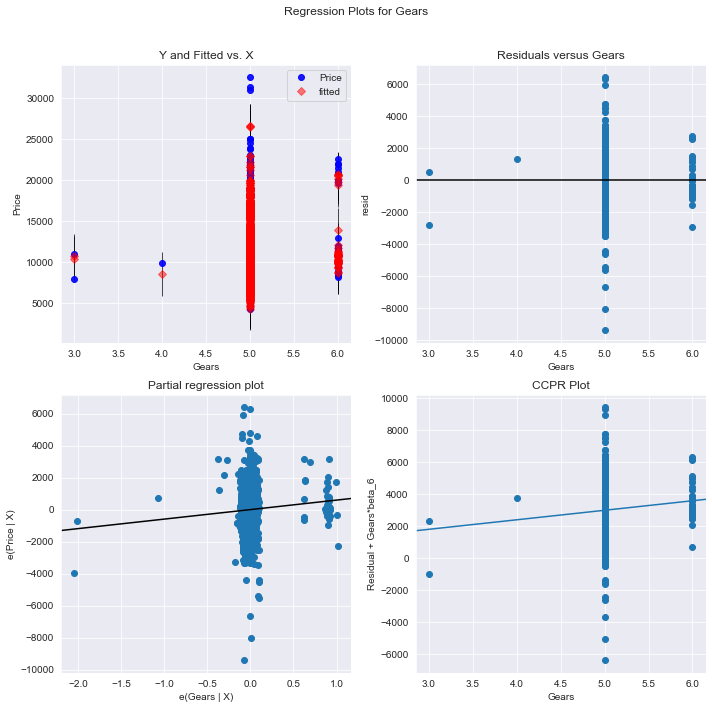

In [25]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

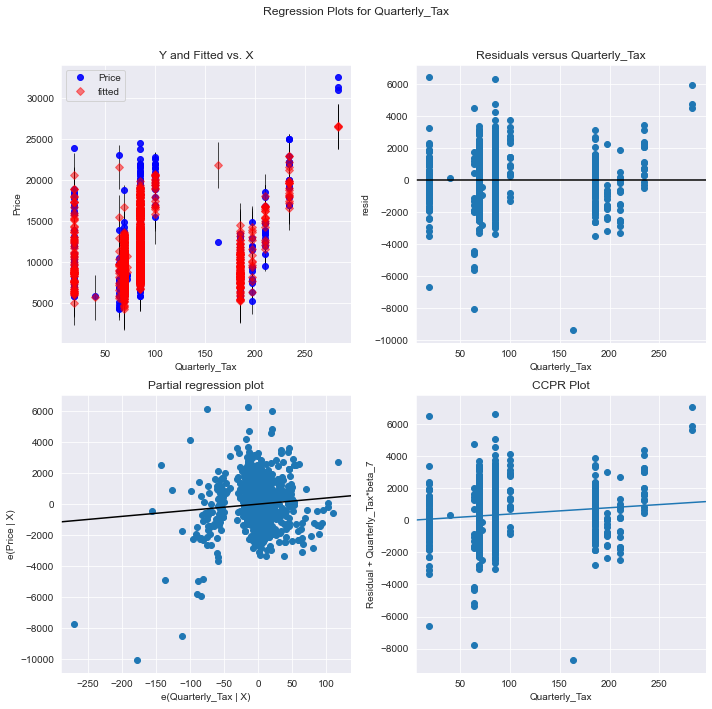

In [26]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig = fig)
plt.show()

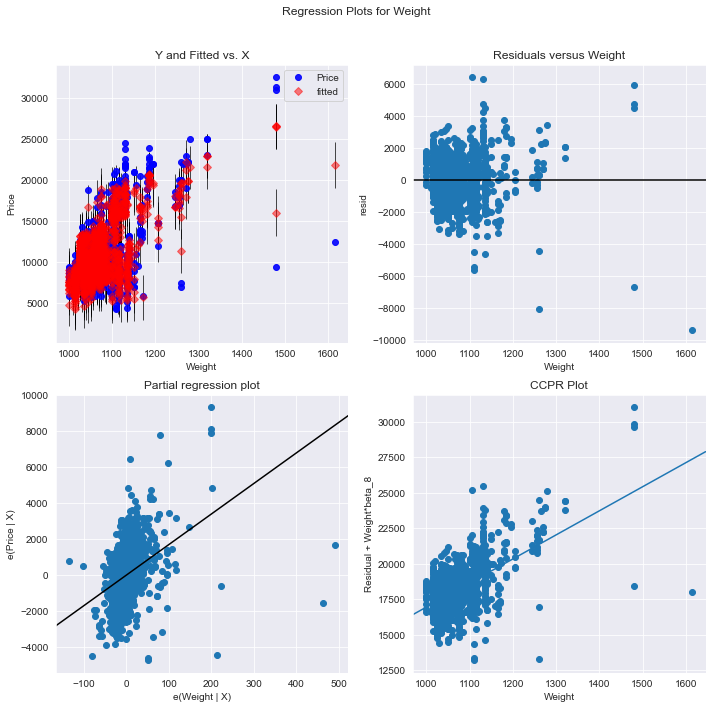

In [27]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)
plt.show()

## Model deletion diagnostics

### Detecting Influencers/Outliers

### Cook's Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

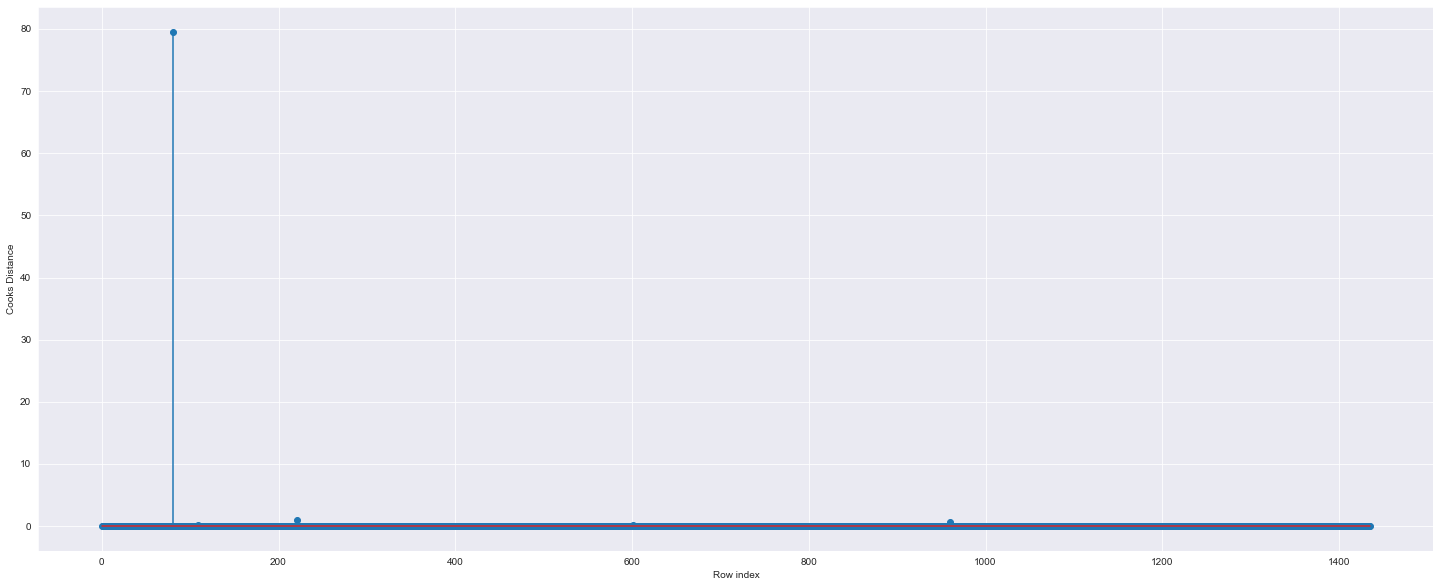

In [29]:
# plot the influencer values usinf stem plot
fig= plt.subplots(figsize = (25,10))
plt.stem(np.arange(len(new_columns)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
# index and value of influencer where c is more than .5
(np.argmax(c), np.max(c))

(80, 79.52010624138181)

### High Influence points

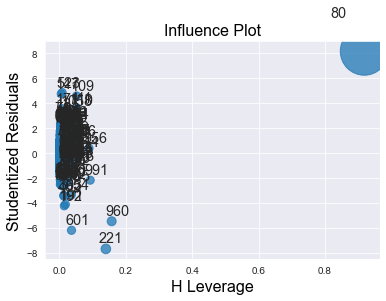

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
new_columns.shape

(1436, 11)

In [33]:
# k = number of variables (columns)
# n = number of observations (rows)

k = new_columns.shape[1]
n = new_columns.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02506963788300836

### From the above plot, it is evident that data point 80 is the influencers

In [34]:
new_columns[new_columns.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
80,18950,25,20019,110,16000,5,5,100,1180,15885.600444,3064.399556


### Improving the model

In [35]:
# Discard the data points which are influencers and reasign the row number (reset_index())
new_columns1 = new_columns.drop(new_columns.index[[80]],axis=0).reset_index()

In [36]:
## Drop the orignal index
new_columns1 = new_columns1.drop(['index'],axis = 1)

In [37]:
new_columns

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


### Build Model

In [38]:
# Exclude variable 'Weight' and generate r-squared and AIC values
final_ml_wt = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax", data = new_columns1).fit()

In [39]:
(final_ml_wt.rsquared, final_ml_wt.aic)

(0.8394508024403655, 24981.322667036107)

In [40]:
# Exclude variable 'Quarterly_Tax' and generate r-squared and AIC values
final_ml_qt = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = new_columns1).fit()

In [41]:
(final_ml_qt.rsquared, final_ml_qt.aic)

(0.8656883979875688, 24725.264231919595)

#### Comparing above R-square and AIC values model 'final_ml_qt' has high R-square and low AIC value hence include variable 'Weight' so that multi collinearity problem would be resolved.

### Cook's Distance

In [42]:
model_influence_qt = final_ml_qt.get_influence()
(c_qt, _) = model_influence_qt.cooks_distance

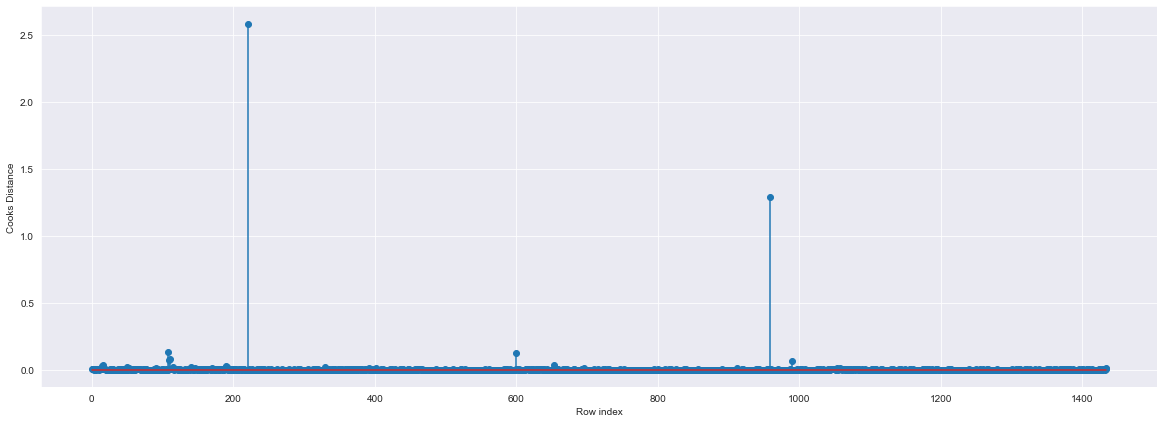

In [43]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(new_columns1)), np.round(c_qt, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
# index and value of influencer where c is more than .5
(np.argmax(c_qt), np.max(c_qt))

(220, 2.585431186189713)

In [45]:
# Drop 220 observation
new_columns2 = new_columns1.drop(new_columns1.index[[220]],axis=0)

In [46]:
new_columns2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [47]:
# Reset the index and re arrange the row values
new_columns3 = new_columns2.reset_index()

In [48]:
new_columns4 = new_columns3.drop(['index'],axis = 1)

In [49]:
new_columns4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1430,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1431,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1432,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [50]:
# Build the model on the data
final_ml_qt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = new_columns4).fit()

In [51]:
# Again check for influencer
model_influence_qt = final_ml_qt.get_influence()
(c_qt, _) = model_influence_qt.cooks_distance

Text(0, 0.5, 'Cooks Distance')

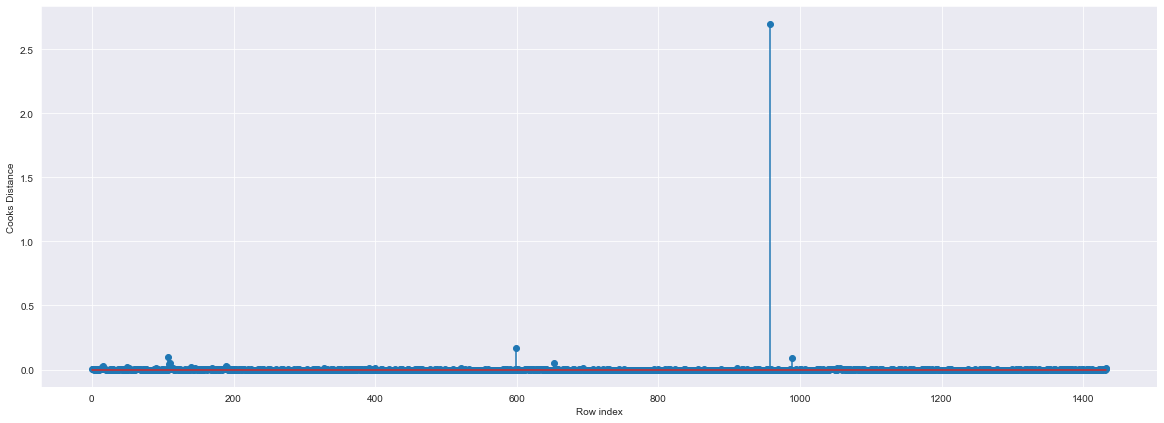

In [52]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(new_columns4)), np.round(c_qt,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [53]:
# index of the data points where c is more than .5
(np.argmax(c_qt), np.max(c_qt))

(958, 2.701200496965862)

In [54]:
# Drop 958 observation
new_columns5 = new_columns4.drop(new_columns4.index[[958]],axis=0)

In [55]:
new_columns5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1430,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1431,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1432,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [56]:
# Reset the index and re arrange the row values
new_columns6 = new_columns5.reset_index()

In [57]:
new_columns7 = new_columns6.drop(['index'],axis = 1)

In [58]:
new_columns7

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1429,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1430,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1431,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [59]:
# Build the model on the data
final_ml_qt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = new_columns7).fit()

In [60]:
# Again check for influencer
model_influence_qt = final_ml_qt.get_influence()
(c_qt, _) = model_influence_qt.cooks_distance

Text(0, 0.5, 'Cooks Distance')

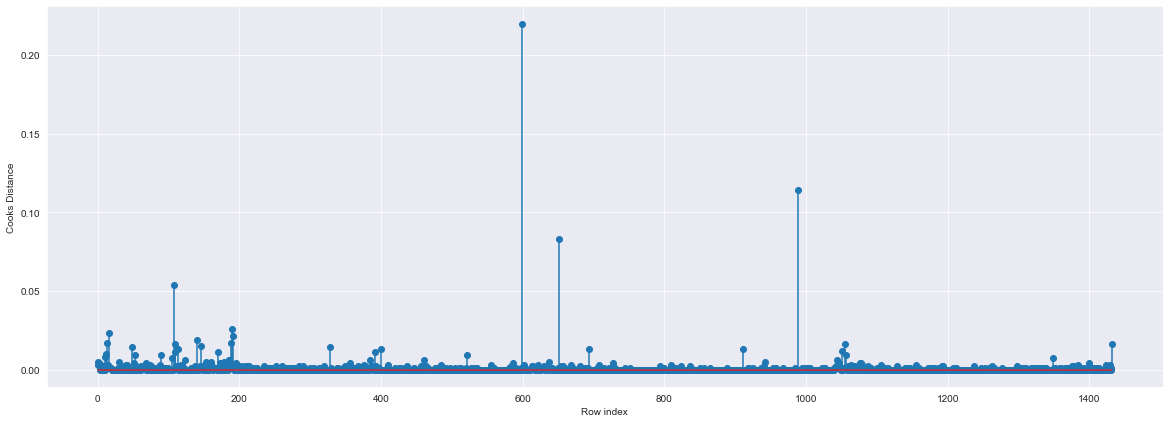

In [61]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(new_columns7)), np.round(c_qt,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [62]:
# index of the data points where c is more than .5
(np.argmax(c_qt), np.max(c_qt))

(599, 0.21998042709641552)

### Since the value is <1, we can stop the diagnostic process and finalize the model

In [63]:
# Build the model on the data
final_ml_qt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = new_columns7).fit()

In [64]:
(final_ml_qt.rsquared, final_ml_qt.aic)

(0.8840192903897235, 24482.18589185263)

### Predicting for new data

In [65]:
# new data for prediction
new_data = pd.DataFrame({'Age_08_04':30,'KM':55000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Weight':1160,'Quarterly_Tax':210},index = [1])

In [66]:
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Weight,Quarterly_Tax
1,30,55000,90,2000,3,5,1160,210


In [67]:
final_ml_qt.predict(new_data)

1    15036.301476
dtype: float64

In [69]:
final_ml_qt.predict(new_columns7)

0       16118.058407
1       15688.778596
2       16092.982559
3       15764.281185
4       15634.939211
            ...     
1428     9069.329722
1429     8432.171004
1430     8577.324773
1431     8691.313533
1432    11002.102116
Length: 1433, dtype: float64

In [73]:
new_columns7['New_Predicted'] = final_ml_qt.predict(new_columns7)
new_columns7['Errors'] = final_ml_qt.resid
new_columns7

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,Errors,New_Predicted
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-2618.058407,16118.058407
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-1938.778596,15688.778596
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2142.982559,16092.982559
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-814.281185,15764.281185
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-1884.939211,15634.939211
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1569.329722,9069.329722
1429,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2412.828996,8432.171004
1430,8500,71,17016,86,1300,3,5,69,1015,8454.298007,-77.324773,8577.324773
1431,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1441.313533,8691.313533


In [76]:
new_columns7 = new_columns7[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Predicted','New_Predicted','Errors']]
new_columns7

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted,New_Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,16118.058407,-2618.058407
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,15688.778596,-1938.778596
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,16092.982559,-2142.982559
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,15764.281185,-814.281185
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,15634.939211,-1884.939211
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025,8793.758297,9069.329722,-1569.329722
1429,10845,72,19000,86,1300,3,5,69,1015,8291.338421,8432.171004,2412.828996
1430,8500,71,17016,86,1300,3,5,69,1015,8454.298007,8577.324773,-77.324773
1431,7250,70,16916,86,1300,3,5,69,1015,8578.038121,8691.313533,-1441.313533
